In [1]:
import os
import cv2
from tqdm import tqdm
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import gc

import bloscpack as bp

from utils import *
from config import *

In [2]:
TRAIN = [
    '../input/train_image_data_0.parquet',
     '../input/train_image_data_1.parquet',
     '../input/train_image_data_2.parquet',
     '../input/train_image_data_3.parquet'
]

OUT_TRAIN = 'train.zip'

In [3]:
%%time
debug = False
datadir = '../input'
featherdir = datadir
indices = [0] if debug else [0, 1, 2, 3]
train_images, label_traces = prepare_image(datadir, featherdir, data_type='train', submission=False, indices=indices)

image_df_list 4
CPU times: user 1min 16s, sys: 10.2 s, total: 1min 26s
Wall time: 1min 6s


In [4]:
import imgaug as ia
import imgaug.augmenters as iaa

In [5]:
# augs = iaa.SomeOf(
#     (0, 2),
#     [
#         iaa.SomeOf(
#             (1, 2),
#             [
#                 iaa.OneOf(
#                     [
#                         iaa.Affine(scale={"x": (0.8, 1.), "y": (0.8, 1.)}, rotate=(-15, 15), shear=(-15, 15)),
#                         iaa.PerspectiveTransform(scale=.08, keep_size=True),
#                     ]
#                 ),
#                 iaa.PiecewiseAffine(scale=(0.02, 0.04)),
#             ],
#             random_order=True
#         ),
#         iaa.DirectedEdgeDetect(alpha=(.6, .8), direction=(0.0, 1.0)),
#     ],
#     random_order=True
# )
augs = iaa.PiecewiseAffine(scale=.05)

In [4]:
ndcs = iter(np.arange(train_images.shape[0]))

In [6]:
img.shape

(224, 224)

56


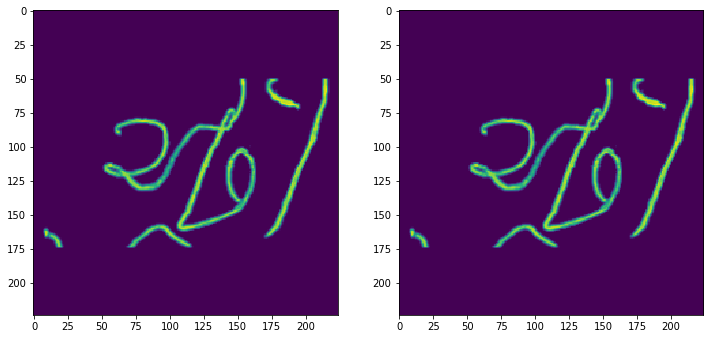

In [62]:
ndx = next(ndcs)
print(ndx)
img = train_images[ndx]
img_aug = img#augs(image=img)
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img)
ax[1].imshow(img_aug)

In [7]:
np.save('../features/train_label_traces', label_traces)

In [63]:
bp.pack_ndarray_to_file(train_images, '../features/train_images_size224_pad6.bloscpack')

In [9]:
train = pd.read_csv('../input/train.csv')

In [5]:
train.loc[train['grapheme_root'] == 2]

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
1226,Train_1226,2,1,4,অ্যা
1244,Train_1244,2,1,4,অ্যা
1520,Train_1520,2,1,4,অ্যা
2030,Train_2030,2,0,0,অ
2108,Train_2108,2,0,0,অ
...,...,...,...,...,...
195973,Train_195973,2,1,4,অ্যা
196385,Train_196385,2,1,4,অ্যা
197664,Train_197664,2,1,4,অ্যা
198908,Train_198908,2,1,4,অ্যা


In [6]:
lbl_traces = np.load('../features/train_label_traces.npy', allow_pickle=True)

In [10]:
np.all(lbl_traces == train.iloc[:, 0:1].values)

True

In [10]:
train.shape

(200840, 5)

In [3]:
df = pd.read_parquet(TRAIN[0])

In [27]:
img.dtype

dtype('uint8')

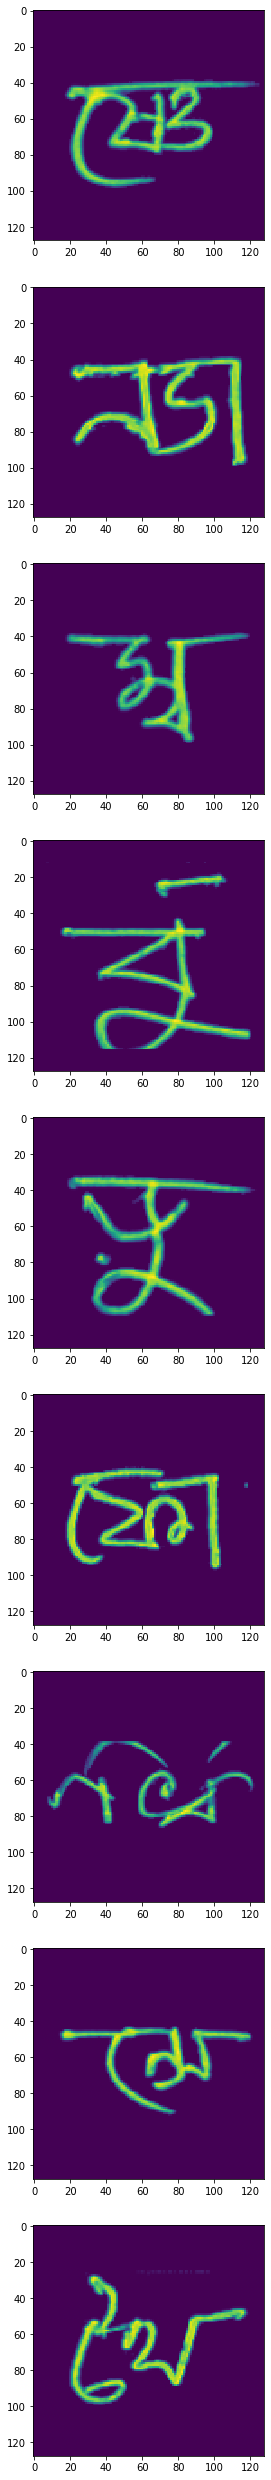

In [17]:
n_imgs = 9
fig, axs = plt.subplots(n_imgs, 1, figsize=(10, 5*n_imgs))

for idx in range(n_imgs):
    img = train_images[idx+1000, :, :]

    axs[idx].imshow(img)
plt.show()